# Setup

Import libraries and setup data paths

In [1]:
import glob
import numpy as np
import rasterio

import matplotlib.pyplot as plt

In [2]:
data_dir = "/Users/abhiag/Omdena/douala_cameroon_LULC/data/ESA_WorldCover_10m_2021_v200_60deg_macrotile_S30E000"

# Visualize Label Data

In [3]:
label_files = glob.glob(f"{data_dir}/*.tif")
label_files[:6]

['/Users/abhiag/Omdena/douala_cameroon_LULC/data/ESA_WorldCover_10m_2021_v200_60deg_macrotile_S30E000/ESA_WorldCover_10m_2021_V200_N00E018_Map.tif',
 '/Users/abhiag/Omdena/douala_cameroon_LULC/data/ESA_WorldCover_10m_2021_v200_60deg_macrotile_S30E000/ESA_WorldCover_10m_2021_V200_N18E039_Map.tif',
 '/Users/abhiag/Omdena/douala_cameroon_LULC/data/ESA_WorldCover_10m_2021_v200_60deg_macrotile_S30E000/ESA_WorldCover_10m_2021_V200_N21E024_Map.tif',
 '/Users/abhiag/Omdena/douala_cameroon_LULC/data/ESA_WorldCover_10m_2021_v200_60deg_macrotile_S30E000/ESA_WorldCover_10m_2021_V200_S03E033_Map.tif',
 '/Users/abhiag/Omdena/douala_cameroon_LULC/data/ESA_WorldCover_10m_2021_v200_60deg_macrotile_S30E000/ESA_WorldCover_10m_2021_V200_S18E054_Map.tif',
 '/Users/abhiag/Omdena/douala_cameroon_LULC/data/ESA_WorldCover_10m_2021_v200_60deg_macrotile_S30E000/ESA_WorldCover_10m_2021_V200_N24E057_Map.tif']

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 36000, 'height': 36000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.333333333333333e-05, 0.0, 18.0,
       0.0, -8.333333333333333e-05, 3.0)}


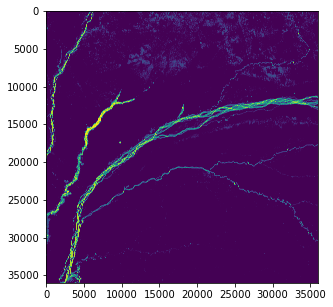

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 36000, 'height': 36000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.333333333333333e-05, 0.0, 39.0,
       0.0, -8.333333333333333e-05, 21.0)}


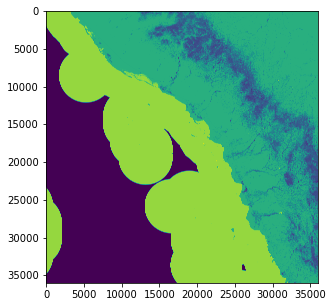

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 36000, 'height': 36000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.333333333333333e-05, 0.0, 24.0,
       0.0, -8.333333333333333e-05, 24.0)}


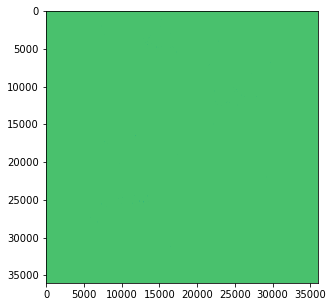

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 36000, 'height': 36000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.333333333333333e-05, 0.0, 33.0,
       0.0, -8.333333333333333e-05, 0.0)}


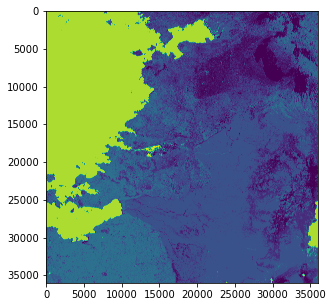

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 36000, 'height': 36000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.333333333333333e-05, 0.0, 54.0,
       0.0, -8.333333333333333e-05, -15.0)}


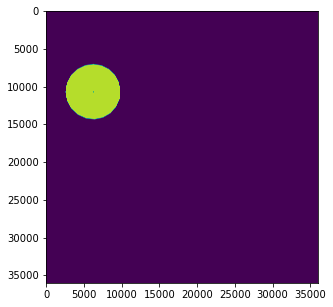

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 36000, 'height': 36000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.333333333333333e-05, 0.0, 57.0,
       0.0, -8.333333333333333e-05, 27.0)}


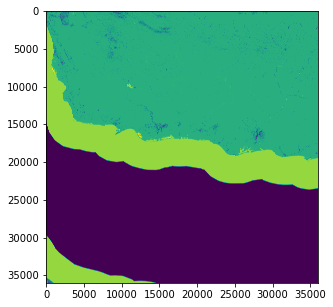

In [6]:
array = {}
for i in range(6):
    img = rasterio.open(label_files[i])
    array[i] = img.read(1)
    print(img.meta)
    fig, axes = plt.subplots(1, 1, figsize=(10, 5))
    axes.imshow(array[i])
    plt.show()

In [8]:
for i in range(10):
    print(i,array[i].shape)

0 (36000, 36000)
1 (36000, 36000)
2 (36000, 36000)
3 (36000, 36000)
4 (36000, 36000)
5 (36000, 36000)


KeyError: 6

In [ ]:
np.unique(array[:])

# Download Satellite Data

In [ ]:
import ee
 
# Trigger the authentication flow.
ee.Authenticate()
 
# Initialize the library.
ee.Initialize()

In [ ]:
# coordinates of rectangle
geoJSON = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              9.908591203258425,
              4.270479750714145
            ],
            [
              9.430251630581239,
              4.270479750714145
            ],
            [
              9.430251630581239,
              3.7689181331470394
            ],
            [
              9.908591203258425,
              3.7689181331470394
            ],
            [
              9.908591203258425,
              4.270479750714145
            ]
          ]
        ],
        "type": "Polygon"
      }
    }
  ]
}

In [ ]:
coords = geoJSON['features'][0]['geometry']['coordinates']
aoi = ee.Geometry.Polygon(coords)

ffa_db = ee.Image(ee.ImageCollection('COPERNICUS/S1_GRD') 
                       .filterBounds(aoi) 
                       .filterDate(ee.Date('2020-08-01'), ee.Date('2020-08-31')) 
                       .first() 
                       .clip(aoi))

url = ffa_db.select('VV').getThumbURL({'min': -20, 'max': 0})

In [ ]:
!pwd